In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm



In [2]:
REBUILD_DATA = True # set to true to one once, then back to false unless you want to change something in your training data.

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])  # do something like print(np.eye(2)[1]), just makes one_hot 
                        #print(np.eye(2)[self.LABELS[label]])

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass
                        #print(label, f, str(e))

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

  1%|          | 111/12501 [00:00<00:11, 1102.02it/s]

PetImages/Cat


  1%|          | 94/12501 [00:00<00:13, 933.27it/s]

PetImages/Dog


100%|██████████| 12501/12501 [00:11<00:00, 1049.09it/s]


Cats: 12476
Dogs: 12470


In [3]:
training_data = np.load("training_data.npy", allow_pickle=True)

In [4]:
print(len(training_data))

24946


In [5]:
print(training_data[0])

[array([[184, 177, 171, ..., 165, 166, 175],
       [178, 172, 171, ..., 168, 172, 180],
       [175, 169, 167, ..., 170, 179, 182],
       ...,
       [124, 109, 120, ..., 147, 137, 129],
       [129, 125, 134, ..., 128, 136, 143],
       [128, 128, 128, ..., 109, 112, 148]], dtype=uint8)
 array([1., 0.])]


In [6]:
import matplotlib.pyplot as plt

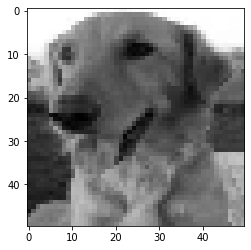

In [7]:
plt.imshow(training_data[1][0], cmap="gray")

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1 , 32, 5)
        self.conv2 = nn.Conv2d(32 , 64, 5)
        self.conv3 = nn.Conv2d(64 , 128, 5)
        